In [1]:
# Set up and load data
# Includes
import sys
import os
import numpy as np
import json
import os


# Setup paths containing utility
curr_folder = os.getcwd()
sys.path.insert(0, os.path.join(curr_folder,'../../../app'))

# Utils imports for loading data
from utils import save_data, load_data, exists_datafolder
from utils import load_SQuAD_train, load_SQuAD_dev
from utils import get_foldername
from utils_NLP import text2sentences,words2words_blanked,words2words_hashblank,words2answers
from utils_NLP import words2text
from utils_SQuAD import OR_arts_paragraph_fields,merge_arts_paragraph_fields
from utils_NLP import allenNLP_classify_blanks,allenNLP_classify_blanks_fromResults

# Plotting includes
from utils_EDAplots import plotbar_train_dev,plothist_train_dev,plotbar_train_dev2,plothist_train_dev2

# Stats saving stuff
from utils_EDA import calcstats_train_dev

# AllenNLP stuff
from allennlp.predictors import Predictor

# Include custom AllenNLP
import myallennlp
from myallennlp import *
from myallennlp.models.simple_tagger2 import SimpleTagger2
from myallennlp.dataset_readers import sequence_tagging2
from myallennlp.data.tokenizers.word_splitter import SpacyWordSplitter

# Import fig stuff
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Option for merging NER data into combined model
merge_in_NER_data = False

# Manually test the predictor

## Load the predictor

In [3]:
# Set up AllenNLP
currmodel = os.path.join('.','model.tar.gz')
predictor = Predictor.from_path(currmodel,predictor_name='sentence-tagger');

02/24/2019 00:20:25 - INFO - allennlp.models.archival -   loading archive file ./model.tar.gz
02/24/2019 00:20:25 - INFO - allennlp.models.archival -   extracting archive file ./model.tar.gz to temp dir /tmp/tmpyt6e_2ha
02/24/2019 00:20:25 - INFO - allennlp.common.params -   type = default
02/24/2019 00:20:25 - INFO - allennlp.data.vocabulary -   Loading token dictionary from /tmp/tmpyt6e_2ha/vocabulary.
02/24/2019 00:20:25 - INFO - allennlp.common.from_params -   instantiating class <class 'allennlp.models.model.Model'> from params {'Ntags0': 95, 'Ntags1': 5, 'do_crossentropy_weighting': True, 'encoder': {'bidirectional': True, 'dropout': 0.5, 'hidden_size': 72, 'input_size': 72, 'num_layers': 2, 'type': 'lstm'}, 'text_field_embedder': {'token_embedders': {'dependency_label': {'embedding_dim': 10, 'type': 'embedding', 'vocab_namespace': 'dependencies'}, 'ner_tag': {'embedding_dim': 7, 'type': 'embedding', 'vocab_namespace': 'ner'}, 'pos_tag': {'embedding_dim': 5, 'type': 'embedding', 

## Run on test sentence

In [4]:
results = predictor.predict(sentence='Pitch is an auditory sensation based on the frequency of vibration.');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_hashblank(words,tags)
print(out)

['___Pitch___', 'is', 'an', '___auditory___', 'sensation', 'based', 'on', 'the', 'frequency', 'of', '___vibration___', '.']


In [5]:
results = predictor.predict(sentence='The Normans are from northern France.');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_hashblank(words,tags)
print(out)

['The', '___Normans___', 'are', 'from', '___northern___', '___France___', '.']


In [6]:
results = predictor.predict(sentence='The brain is an organ that serves as the center of the nervous system in all vertebrate and most invertebrate animals.');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_hashblank(words,tags)
print(out)

['___The___', '___brain___', 'is', 'an', '___organ___', 'that', 'serves', 'as', 'the', '___center___', 'of', 'the', '___nervous___', 'system', 'in', 'all', '___vertebrate___', 'and', 'most', '___invertebrate___', 'animals', '.']


In [7]:
results = predictor.predict(sentence='Physiologically, the function of the brain is to exert centralized control over the other organs of the body.');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_blanked(words,tags)
print(out)

['______', ',', 'the', '______', 'of', 'the', '______', 'is', 'to', 'exert', '______', '______', 'over', 'the', 'other', 'organs', 'of', 'the', 'body', '.']


In [8]:
results = predictor.predict(sentence='The Black Death ravaged Europe for three years before it continued on into Russia, where the disease was present somewhere in the country 25 times between 1350 to 1490.');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_blanked(words,tags)
print(out)

['The', '______', '______', 'ravaged', 'Europe', 'for', '______', 'years', 'before', 'it', 'continued', 'on', 'into', '______', ',', 'where', 'the', 'disease', 'was', 'present', 'somewhere', 'in', 'the', 'country', '25', 'times', 'between', '______', 'to', '______', '.']


In [9]:
results = predictor.predict(sentence='The Black Death ravaged Europe for three years before it continued on into Russia.');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_blanked(words,tags)
print(out)

['The', '______', '______', 'ravaged', 'Europe', 'for', '______', 'years', 'before', 'it', 'continued', 'on', 'into', '______', '.']


In [10]:
results = predictor.predict(sentence='I continued on into Russia, which is a country.');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_blanked(words,tags)
print(out)

['I', 'continued', 'on', 'into', '______', ',', 'which', 'is', 'a', 'country', '.']


In [11]:
results = predictor.predict(sentence='I continued on into Russia, which is a food.');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_blanked(words,tags)
print(out)

['I', 'continued', 'on', 'into', '______', ',', 'which', 'is', 'a', 'food', '.']


In [12]:
results = predictor.predict(sentence='Moscow is the capital of Russia.');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_blanked(words,tags)
print(out)

['______', 'is', 'the', 'capital', 'of', '______', '.']


In [13]:
results = predictor.predict(sentence='London is the capital of England.');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_blanked(words,tags)
print(out)

['______', 'is', 'the', '______', 'of', '______', '.']


In [14]:
results = predictor.predict(sentence='Berlin is the capital of England');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_blanked(words,tags)
print(out)

['______', 'is', 'the', 'capital', 'of', '______']


In [15]:
results = predictor.predict(sentence='Moscow is the capital of England');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_blanked(words,tags)
print(out)

['______', 'is', 'the', 'capital', 'of', '______']


In [16]:
results = predictor.predict(sentence='Bacon is the capital of England');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_blanked(words,tags)
print(out)

['______', 'is', 'the', 'capital', 'of', '______']


In [68]:
results = predictor.predict(sentence='Plague is a type of disease');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_blanked(words,tags)
print(out)

['______', 'is', 'a', 'type', 'of', 'disease']


In [69]:
results = predictor.predict(sentence='Data is a form of information');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_blanked(words,tags)
print(out)

['______', 'is', 'a', 'form', 'of', 'information']


In [70]:
results = predictor.predict(sentence='Data is a form of knowledge');
words = results['words']
tags = allenNLP_classify_blanks_fromResults(results,'0')
out = words_blanked_allen = words2words_blanked(words,tags)
print(out)

['Data', 'is', 'a', 'form', 'of', '______']


In [18]:
# # Pull out sample paragraph
# p = arts[ind_ex_dev]['paragraphs'][0]

# # # Print all AllenNLP classifications
# # print([(a,b) for a,b in zip(p['allenNER']['words'].split(), p['allenNER']['tags'].split())])

# # AllenNLP results
# words = p['allenNER']['words'].split()
# # tags = p['allenNER']['tags'].split()
# # tags = [not t == '0' for t in tags]   # Convert to binary
# tags = p['blank_classified_allen']

# # Ground truth
# blank_classification = p['blank_classification']


# words_blanked_ground_truth = words2words_blanked(words,blank_classification)
# words_blanked_allen = words2words_blanked(words,tags)


# Load and merge ground truth and MODEL data

In [19]:
!pwd

/home/davestanley/Dropbox/git/mindpocket/train_model/articles_batch5.0/model6e0c37


In [20]:
# Load data containing MODEL (predictions)
foldername = os.path.join('SQ_pp_b4m0c2')
arts_train = load_data('train.json',foldername,prepend_data_folder=False)
arts_dev = load_data('dev.json',foldername,prepend_data_folder=False)

# All articles
Ntrain = len(arts_train)
Ndev = len(arts_dev)

arts = arts_train + arts_dev
print(arts[1]['title'])
# print(arts[1]['paragraphs'][0]['context'])

Frédéric_Chopin


In [21]:
arts[0]['paragraphs'][0].keys()

dict_keys(['qas', 'context', 'allenNER'])

In [22]:
# Trim down newly loaded articles to match Narticles in training set
ind_train = slice(0,Ntrain)
ind_dev = slice(0,Ndev)

# Chosen display articles
ind_ex_train = 1                   # Example from training set - Chopin
ind_ex_train = 381                   # Example from training set - Roman Republic
ind_ex_train = 213                   # Example from training set - Roman Republic
ind_ex_dev = Ntrain + (467-442)    # Example from dev set - Immune system
ind_ex_dev = Ntrain + (458-442)    # Example from dev set - Pharmacy
ind_ex_dev = Ntrain + (456-442)    # Example from dev set - Black death
# ind_ex_dev = 105                   # Pitch
ind_ex_dev = ind_ex_train          # Use train for everything

In [23]:
# Load blanks data (ground truth)
foldername = get_foldername('sq_pp_training')
arts3 = load_data('train.json',foldername)[ind_train] + load_data('dev.json',foldername)[ind_dev]
print(arts3[ind_ex_train]['title'])
# print(arts3[1]['paragraphs'][0]['context_blanked'])


Data_compression


In [24]:
# Make sure all titles match
all_title_pairs = [(a1['title'],a3['title']) for a1,a3 in zip(arts,arts3)]
titles_match_bool = [a1['title'] == a3['title'] for a1,a3 in zip(arts,arts3)]
print("Matching titles: {} \nTotal articles {}".format(sum(titles_match_bool),len(titles_match_bool)))
if not sum(titles_match_bool) == len(titles_match_bool):
    raise ValueError('Articles mismatch.')


Matching titles: 477 
Total articles 477


In [25]:
# Merge ground truth blanks with original data to get full dataset
list_of_fields = ['context_blanked','blank_classification']
arts = merge_arts_paragraph_fields(arts,arts3,list_of_fields)

# print(arts[1]['title'])
# print(arts[1]['paragraphs'][0]['context'])
# print(arts[1]['paragraphs'][0]['context_blanked'])

In [26]:
arts[ind_ex_train]['paragraphs'][0]['context']

'In signal processing, data compression, source coding, or bit-rate reduction involves encoding information using fewer bits than the original representation. Compression can be either lossy or lossless. Lossless compression reduces bits by identifying and eliminating statistical redundancy. No information is lost in lossless compression. Lossy compression reduces bits by identifying unnecessary information and removing it. The process of reducing the size of a data file is referred to as data compression. In the context of data transmission, it is called source coding (encoding done at the source of the data before it is stored or transmitted) in opposition to channel coding.'

In [27]:
# Convert AllenNLP Model blanks classification into standard format

# If doing merge, use unique name for this model result. Otherwise, use generic name
if merge_in_NER_data: fieldname = 'blank_classified_allenMODEL'
else: fieldname = 'blank_classified_allen'

arts = allenNLP_classify_blanks(arts,'0',fieldname)
arts[0]['paragraphs'][0].keys()

dict_keys(['qas', 'context', 'allenNER', 'context_blanked', 'blank_classification', 'blank_classified_allen'])

# Load NER data and merge into arts dataset

In [28]:

if merge_in_NER_data:
    # Load data containing NEP (predictions)
    foldername = get_foldername('sq_pp_ner')

    arts_NER = load_data('train.json',foldername)[ind_train] + load_data('dev.json',foldername)[ind_dev]
    print(arts[1]['title'])
    # print(arts[1]['paragraphs'][0]['context'])

    # Make sure all titles match
    all_title_pairs = [(a1['title'],a3['title']) for a1,a3 in zip(arts,arts_NER)]
    titles_match_bool = [a1['title'] == a3['title'] for a1,a3 in zip(arts,arts_NER)]
    print("Matching titles: {} \nTotal articles {}".format(sum(titles_match_bool),len(titles_match_bool)))
    if not sum(titles_match_bool) == len(titles_match_bool):
        raise ValueError('Articles mismatch.')

    # Convert AllenNLP Model blanks classification into standard format
    from utils_NLP import allenNLP_classify_blanks
    arts_NER = allenNLP_classify_blanks(arts_NER,'O','blank_classified_allenNER')
    print(arts_NER[0]['paragraphs'][0].keys())

    # Merge NER data into full dataset
    list_of_fields = ['blank_classified_allenNER']
    arts = merge_arts_paragraph_fields(arts,arts_NER,list_of_fields)
    print(arts[0]['paragraphs'][0].keys())

In [29]:
# OR operation on blank_classified_allenMODEL and blank_classified_allenNER into blank_classified_allenMODEL

if merge_in_NER_data:
    destination_fieldname = 'blank_classified_allen'
    arts = OR_arts_paragraph_fields(arts,['blank_classified_allenMODEL','blank_classified_allenNER'],destination_fieldname)

    p = arts[0]['paragraphs'][1]
    print(p['blank_classified_allenNER'])
    print(p['blank_classified_allenMODEL'])
    print(p['blank_classified_allen'])


# Compare paragraph word reconstructions

This just looks at the words in the different saved fiels files to make sure all the words match up 1:1 (otherwise, this could mess up our evaluations). Not looking at blanks here at all. The next sectoin looks at the blanks

In [30]:
# Pull out sample paragraph
p = arts[ind_ex_dev]['paragraphs'][0]

## AllenNLP Words

In [31]:
words = p['allenNER']['words'].split()
tags = p['allenNER']['tags'].split()
print(len(words))
print(len(tags))
print(words2text(words))
print(len(words2text(words)))

116
116
In signal processing, data compression, source coding, or bit - rate reduction involves encoding information using fewer bits than the original representation. Compression can be either lossy or lossless. Lossless compression reduces bits by identifying and eliminating statistical redundancy. No information is lost in lossless compression. Lossy compression reduces bits by identifying unnecessary information and removing it. The process of reducing the size of a data file is referred to as data compression. In the context of data transmission, it is called source coding ( encoding done at the source of the data before it is stored or transmitted ) in opposition to channel coding.
688


## Context

In [32]:
from utils_NLP import allenNLP_split_words, join_punctuation

context = p['context']
context_split = allenNLP_split_words(context)

# context_reassembled = ' '.join(context_split)
context_reassembled = words2text(context_split)

print(len(context_split))
# print(words2text(context_split))
# print(len(words2text(context_split)))
print(context_reassembled)
print(len(context_reassembled))


116
In signal processing, data compression, source coding, or bit - rate reduction involves encoding information using fewer bits than the original representation. Compression can be either lossy or lossless. Lossless compression reduces bits by identifying and eliminating statistical redundancy. No information is lost in lossless compression. Lossy compression reduces bits by identifying unnecessary information and removing it. The process of reducing the size of a data file is referred to as data compression. In the context of data transmission, it is called source coding ( encoding done at the source of the data before it is stored or transmitted ) in opposition to channel coding.
688


## Context_blanked

In [33]:
print(len(p['blank_classification']))
print(p.keys())
print(p['context_blanked'])

116
dict_keys(['qas', 'context', 'allenNER', 'context_blanked', 'blank_classification', 'blank_classified_allen'])
In signal processing , ______ ______ , ______ ______ , or bit - rate reduction involves encoding information using fewer bits than the original representation . ______ can be either lossy or ______ . ______ ______ reduces bits by identifying and eliminating statistical redundancy . No information is lost in ______ ______ . Lossy ______ reduces bits by identifying unnecessary information and removing it . The process of reducing the size of a ______ file is referred to as ______ ______ . In the context of ______ transmission , it is called ______ ______ ( encoding done at the ______ of the ______ before it is stored or transmitted ) in opposition to channel ______ .


In [34]:
# Answers
for i,c in enumerate(p['blank_classification']):
    if c == 1: print(context_split[i])

data
compression
source
coding
Compression
lossless
Lossless
compression
lossless
compression
compression
data
data
compression
data
source
coding
source
data
coding


# Single paragraph - Compare blanks

## First, just look at the raw text

In [35]:
# Pull out sample paragraph
p = arts[ind_ex_dev]['paragraphs'][0]

# # Print all AllenNLP classifications
# print([(a,b) for a,b in zip(p['allenNER']['words'].split(), p['allenNER']['tags'].split())])

# AllenNLP results
words = p['allenNER']['words'].split()
# tags = p['allenNER']['tags'].split()
# tags = [not t == '0' for t in tags]   # Convert to binary
tags = p['blank_classified_allen']

# Ground truth
blank_classification = p['blank_classification']

In [36]:


print("Length Allen tags: {}. Length ground truth blanks: {}".format(len(tags),len(blank_classification)))

Length Allen tags: 116. Length ground truth blanks: 116


In [37]:
# Side by side compare

words_blanked_ground_truth = words2words_blanked(words,blank_classification)
words_blanked_allen = words2words_blanked(words,tags)

N=len(words_blanked_ground_truth)
N=20
print("============" + '\t\t\t' + "==========")
print("Ground truth" + '\t\t\t' + "Prediction")
print("============" + '\t\t\t' + "==========")
for c,w in zip(words_blanked_ground_truth[:N],words_blanked_allen[:N]):
    print(c + '\t\t\t\t' + w)


============			==========
Ground truth			Prediction
============			==========
In				In
signal				______
processing				processing
,				,
______				data
______				______
,				,
______				______
______				______
,				,
or				or
bit				______
-				-
rate				rate
reduction				______
involves				involves
encoding				encoding
information				information
using				using
fewer				fewer


## Ground truth blanked

In [38]:
# Blanked text
print(words2text(words_blanked_ground_truth))

# Answers    
myanswers = words2answers(words,blank_classification)
print("Answers:")
print(myanswers)

In signal processing, ______ ______, ______ ______, or bit - rate reduction involves encoding information using fewer bits than the original representation. ______ can be either lossy or ______. ______ ______ reduces bits by identifying and eliminating statistical redundancy. No information is lost in ______ ______. Lossy ______ reduces bits by identifying unnecessary information and removing it. The process of reducing the size of a ______ file is referred to as ______ ______. In the context of ______ transmission, it is called ______ ______ ( encoding done at the ______ of the ______ before it is stored or transmitted ) in opposition to channel ______.
Answers:
['data', 'compression', 'source', 'coding', 'Compression', 'lossless', 'Lossless', 'compression', 'lossless', 'compression', 'compression', 'data', 'data', 'compression', 'data', 'source', 'coding', 'source', 'data', 'coding']


In [39]:
# Blanked text
print(words2text(words_blanked_allen))

# Answers    
myanswers = words2answers(words,tags)
print("Answers:")
print(myanswers)

In ______ processing, data ______, ______ ______, or ______ - rate ______ involves encoding information using fewer ______ than the original ______. ______ can be either ______ or ______. ______ ______ ______ ______ by identifying and eliminating ______ ______. No ______ is lost in ______ ______. ______ ______ ______ ______ by identifying ______ ______ and ______ it. The ______ of ______ the size of a ______ ______ is referred to as ______ ______. In the ______ of ______ ______, it is called ______ ______ ( ______ done at the source of the data before it is stored or ______ ) in ______ to ______ ______.
Answers:
['signal', 'compression', 'source', 'coding', 'bit', 'reduction', 'bits', 'representation', 'Compression', 'lossy', 'lossless', 'Lossless', 'compression', 'reduces', 'bits', 'statistical', 'redundancy', 'information', 'lossless', 'compression', 'Lossy', 'compression', 'reduces', 'bits', 'unnecessary', 'information', 'removing', 'process', 'reducing', 'data', 'file', 'data', 'co

In [40]:
TP = sum([b and t for b,t in zip(blank_classification,tags)])
FP = sum([not b and t for b,t in zip(blank_classification,tags)])
FN = sum([b and not t for b,t in zip(blank_classification,tags)])
TN = sum([not b and not t for b,t in zip(blank_classification,tags)])
ACC = (TP+TN)/(TP+FP+FN+TN)
ACC2 = sum([b == t for b,t in zip(blank_classification,tags)]) / len(tags)

In [41]:
print(ACC)
print(ACC2)
print(TP)
print(FP)

0.75
0.75
17
26


In [42]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)


In [43]:
print(TPR)
print(FPR)

0.85
0.2708333333333333


In [44]:
Nsentences = len(text2sentences(p['context']))
print("Nsentences={}".format(str(Nsentences)))

Nsentences2 = len(text2sentences(words2text(words)))
print("Nsentences_from_words={}".format(str(Nsentences2)))



Nsentences=7
Nsentences_from_words=7


In [45]:
TPpersent = TP / Nsentences2
FPpersent = FP / Nsentences2

print(TPpersent)
print(FPpersent)

2.4285714285714284
3.7142857142857144


# Single article - compare blanks

In [46]:
##### Pull out sample paragraph
a = arts[ind_ex_dev]
print(a['title'])

# AllenNLP results
words = [w for p in a['paragraphs'] for w in p['allenNER']['words'].split()]
# tags = [t for p in a['paragraphs'] for t in p['allenNER']['tags'].split()]
# tags = [not t == '0' for t in tags]   # Convert to binary
tags = [t for p in a['paragraphs'] for t in p['blank_classified_allen']]

# Ground truth
blank_classification = [bc for p in a['paragraphs'] for bc in p['blank_classification']]

Data_compression


In [47]:

print("Length Allen tags: {}. Length ground truth blanks: {}".format(len(tags),len(blank_classification)))

Length Allen tags: 3244. Length ground truth blanks: 3244


In [48]:
# Side by side compare
words_blanked_ground_truth = words2words_blanked(words,blank_classification)
words_blanked_allen = words2words_blanked(words,tags)

N=len(words_blanked_ground_truth)
N=30
print("========" + '\t\t\t' + "============" + '\t\t\t' + "==========")
print("Original" + '\t\t\t' + "Ground truth" + '\t\t\t' + "Prediction")
print("========" + '\t\t\t' + "============" + '\t\t\t' + "==========")
for o,c,w in zip(words[:N],words_blanked_ground_truth[:N],words_blanked_allen[:N]):
    print(o + '\t\t\t\t' + c + '\t\t\t\t' + w)


========			============			==========
Original			Ground truth			Prediction
========			============			==========
In				In				In
signal				signal				______
processing				processing				processing
,				,				,
data				______				data
compression				______				______
,				,				,
source				______				______
coding				______				______
,				,				,
or				or				or
bit				bit				______
-				-				-
rate				rate				rate
reduction				reduction				______
involves				involves				involves
encoding				encoding				encoding
information				information				information
using				using				using
fewer				fewer				fewer
bits				bits				______
than				than				than
the				the				the
original				original				original
representation				representation				______
.				.				.
Compression				______				______
can				can				can
be				be				be
either				either				either


In [49]:
TP = sum([b and t for b,t in zip(blank_classification,tags)])
FP = sum([not b and t for b,t in zip(blank_classification,tags)])
FN = sum([b and not t for b,t in zip(blank_classification,tags)])
TN = sum([not b and not t for b,t in zip(blank_classification,tags)])
ACC = (TP+TN)/(TP+FP+FN+TN)
ACC2 = sum([b == t for b,t in zip(blank_classification,tags)]) / len(tags)

In [50]:
print(ACC)
print(ACC2)

0.7783600493218249
0.7783600493218249


In [51]:
# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# # Specificity or true negative rate
# TNR = TN/(TN+FP) 
# # Precision or positive predictive value
# PPV = TP/(TP+FP)
# # Negative predictive value
# NPV = TN/(TN+FN)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# # False negative rate
# FNR = FN/(TP+FN)
# # False discovery rate
# FDR = FP/(TP+FP)


In [52]:
# print(TPR)
# print(FPR)

In [53]:
Nsentences2 = len(text2sentences(words2text(words)))
print("Nsentences_from_words={}".format(str(Nsentences2)))

Nsentences_from_words=126


In [54]:
TPpersent = TP / Nsentences2
FPpersent = FP / Nsentences2

print(TPpersent)
print(FPpersent)

1.3492063492063493
5.531746031746032


## Ground truth blanked vs predicted blanked

In [55]:
# Blanked text
# print(words2text(words_blanked_ground_truth))

# Answers    
myanswers = words2answers(words,blank_classification)
print("Answers:")
print(set(myanswers))

Answers:
{'source', 'coding', 'lossless', 'optimal', 'ratios', 'speech', 'temporal', 'MAFE', 'Making', 'bitrate', 'DEFLATE', 'codecs', 'DNAZip', 'GenomeZip', 'variable', 'interframe', 'video', 'LZX', 'Oscar', 'statistical', 'macroblocks', 'differencing', 'estimates', 'Lossless', 'psychoacoustics', 'image', 'Arithmetic', 'contours', 'literature', 'Bonello', 'voltage', 'fractal', 'Huffman', 'voice', 'coders', 'latency', 'compendium', 'masking', 'algorithm', 'Uncompressed', 'Latency', 'compression', 'command', 'Data', 'Lossy', 'DV', 'LZR', 'Compression', 'Voice', 'Brotli', 'longer', 'human', 'data', 'audio', 'arithmetic', 'Genetics', 'color', 'algorithms', 'Video', 'LPC', 'compressed'}


In [56]:
# Blanked text
# print(words2text(words_blanked_allen))

# Answers    
myanswers = words2answers(words,tags)
print("Answers:")
print(set(myanswers))

Answers:
{'source', 'HEVC', '200', 'optimal', 'extra', 'statistics', 'Welch', 'coder', 'PNG', 'compresses', 'perceive', 'encoded', 'contours', 'practical', 'noise', 'Latency', 'simultaneous', 'Hopkins', 'meaningful', 'vision', 'telephone', 'channel', 'reduction', 'luminance', 'posterior', 'techniques', 'nothing', 'standard', 'proportional', 'bitrate', 'lighten', 'decompression', 'datatype', 'digitize', 'history', 'heterogeneity', 'Vorbis', 'JPEG', 'discrete', 'decompress', 'uncompressed', 'flocks', 'strings', 'decoded', 'megabytes', 'context', 'AVC', 'billion', 'time', 'zero', 'decompressed', 'decode', 'predictive', 'compressed', 'viewer', 'rapid', 'bits', 'ripping', 'state', 'separate', 'situation', 'genome', 'spectral', 'HAPZIPPER', 'estimates', 'target', 'reversible', 'distribution', 'remove', '20-fold', 'voltage', 'latency', 'compendium', 'flames', 'absolute', 'minimum', 'entropy', 'numbers', 'best', 'decoding', 'compressor', '2012', 'transformed', 'process', 'greater', 'usage', 'U

## Fract of answers blanked

### Fract answers blanked vs num answers

In [57]:

# Pseudocode
# For each answer, loop through the words and count the number of times it occurs.
# Get the set of blanks booleans associated with each occurrence of that words, and calculate the
# mean. Will do this for each word in the article, and then each article in the corpus. For each
# article, rank the words by their proximity to 50 % 

myanswers_unique = list(set(words2answers(words,tags)))

fracblanked = []
numblanked = []
for ans in myanswers_unique:
    indices = [i for i, w in enumerate(words) if w == ans]
    tags_curr = [tags[i] for i in indices]
    #words_curr = [words[i] for i in indices]
    fracblanked.append(sum(tags_curr)/len(tags_curr)*100)
    numblanked.append(len(tags_curr))

(0, 20)

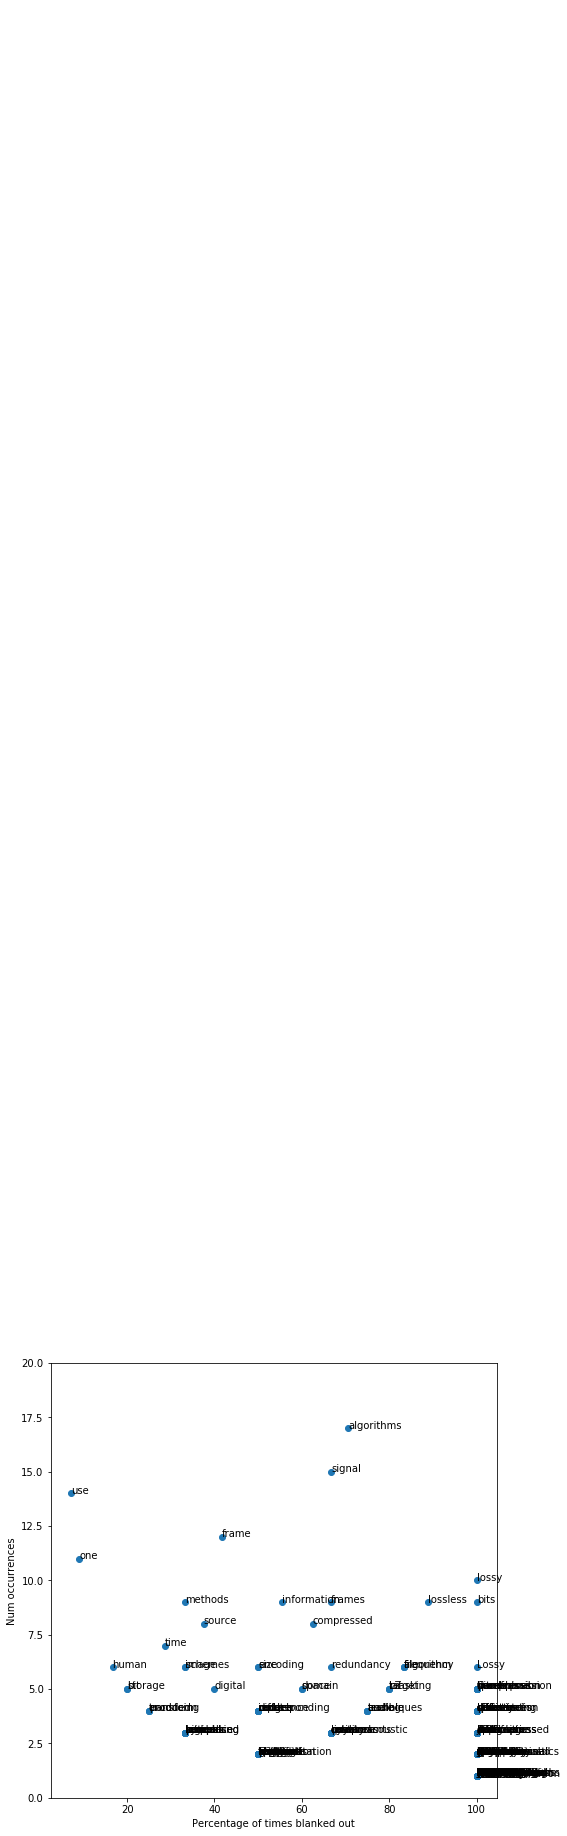

In [73]:
# Do scatter plot
y = numblanked
z = fracblanked
n = myanswers_unique

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
plt.xlabel('Percentage of times blanked out')
plt.ylabel('Num occurrences')
plt.ylim(0,20)

### Fract answers blanked for all answers

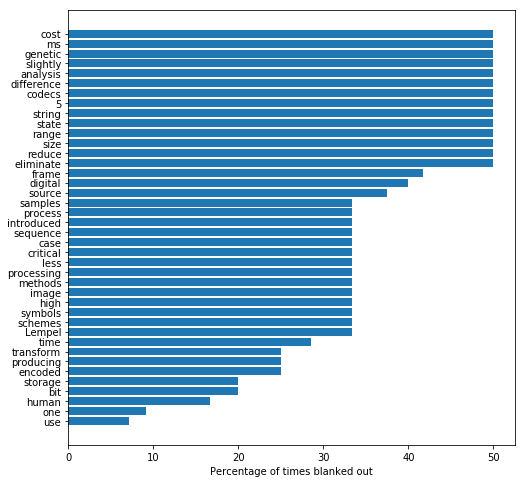

In [75]:
import numpy as np
import pandas as pd

d = {'myanswers_unique':myanswers_unique,'fracblanked':fracblanked}

df = pd.DataFrame(data=d);

df2 = df.sort_values(by='fracblanked',ascending=True);



N=40          # of data points to show
figure(num=None, figsize=(8, 8),facecolor='w', edgecolor='k')
bars = (df2['myanswers_unique'].values.tolist())[0:N]
y_pos = np.arange(len(bars))
val = (df2['fracblanked'].values.tolist())[0:N]
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, val)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel('Percentage of times blanked out')
# Show graphic
plt.show()



### Fractions of POS/NER tags blanked

In [60]:
# Use whitespace tokenizer (https://spacy.io/usage/linguistic-features)
# davedit
from spacy.tokens import Doc
class WhitespaceTokenizer(object):

    def __init__(self, vocab):
        self.vocab = vocab

    def __call__(self, text):
        words = text.split(' ')
        # All tokens 'own' a subsequent space character in this tokenizer
        spaces = [True] * len(words)
        return Doc(self.vocab, words=words, spaces=spaces)


In [61]:
import spacy

nlp = spacy.load('en_core_web_sm')
nlp.tokenizer = WhitespaceTokenizer(nlp.vocab)
doc = nlp(' '.join(words))
# doc = nlp(words2text(words))

pos=[]
ner=[]
dep=[]
for token in doc:
    pos.append(token.pos_)
    ner.append(token.ent_type_)
    dep.append(token.dep_)

# Build a dataframe to store everything
d = {'ind': range(len(words)),
     'words' : words,
    'tags':tags,
    'pos':pos,
    'ner':ner,
    'dep':dep}

# # Build a dataframe to store everything
# d = {'words' : words,
#     'tags':tags,
#     'pos':pos,
#     'ner':ner,
#     'dep':dep}

for k in d.keys():
    print(str(len(d[k])))

3244
3244
3244
3244
3244
3244


In [62]:
df = pd.DataFrame(data=d)
xlabs=[]
yvals=[]

# Search through keys and unique items therein, counting "Trues"
keys = ['ner']
for k in keys:
    for item in list(set(d[k])):
        df2 = df.loc[df[k] == item]
        mysum = df2.sum()['tags']
        N = len(df2)
        
        xlabs.append(k.upper() + ': ' + item.lower())
        yvals.append(mysum/N*100)

        

In [63]:
df3 = df.loc[df['ner'] == 'PERSON']
df3.head()           # Hmmm

,ind,words,tags,pos,ner,dep
375,375,The,0,DET,PERSON,det
376,376,Lempel,1,PROPN,PERSON,compound
377,377,–,0,PUNCT,PERSON,punct
378,378,Ziv,0,PROPN,PERSON,nmod
505,505,Huffman,1,PROPN,PERSON,attr


In [64]:
df = pd.DataFrame(data={'xlabs':xlabs,'yvals':yvals})
df = df.sort_values(by='yvals',ascending=True)
df

,xlabs,yvals
10,NER: ordinal,0.000000
0,NER:,24.879305
7,NER: cardinal,51.851852
1,NER: person,53.333333
9,NER: percent,60.000000
2,NER: date,76.923077
5,NER: org,78.000000
8,NER: gpe,85.714286
3,NER: loc,100.000000
4,NER: quantity,100.000000


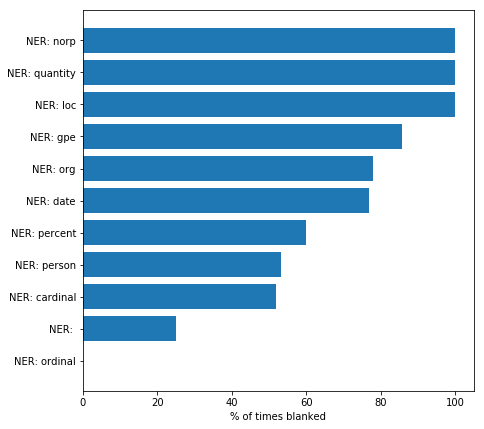

In [65]:
figure(num=None, figsize=(7,7),facecolor='w', edgecolor='k')
bars = df['xlabs']
y_pos = np.arange(len(bars))
val = df['yvals']

# Make fake dataset
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, val)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel('% of times blanked')
# Show graphic
plt.show()


## Whole article

### Ground truth

In [72]:

# print('--------------- GROUND TRUTH ---------------')

# # Pull out sample paragraph
# for p in arts[ind_ex_dev]['paragraphs']:
#     # # Print all AllenNLP classifications
#     # print([(a,b) for a,b in zip(p['allenNER']['words'].split(), p['allenNER']['tags'].split())])

#     # AllenNLP results
#     words = p['allenNER']['words'].split()
#     # tags = p['allenNER']['tags'].split()
#     # tags = [not t == '0' for t in tags]   # Convert to binary
#     tags = p['blank_classified_allen']

#     # Ground truth
#     blank_classification = p['blank_classification']

#     words_blanked_ground_truth = words2words_blanked(words,blank_classification)
#     words_blanked_allen = words2words_blanked(words,tags)
#     words_hash_ground_truth = words2words_hashblank(words,blank_classification)
#     words_hash_allen = words2words_hashblank(words,tags)
    
    
#     # Blanked text
#     print(words2text(words_hash_ground_truth))

#     # Answers    
#     myanswers = words2answers(words,blank_classification)
#     print("Answers:")
#     print(myanswers)

    

### My model

In [67]:

print('--------------- MY MODEL ---------------')
# Pull out sample paragraph
for p in arts[ind_ex_dev]['paragraphs']:
    # # Print all AllenNLP classifications
    # print([(a,b) for a,b in zip(p['allenNER']['words'].split(), p['allenNER']['tags'].split())])

    # AllenNLP results
    words = p['allenNER']['words'].split()
    # tags = p['allenNER']['tags'].split()
    # tags = [not t == '0' for t in tags]   # Convert to binary
    tags = p['blank_classified_allen']

    # Ground truth
    blank_classification = p['blank_classification']

    words_blanked_ground_truth = words2words_blanked(words,blank_classification)
    words_blanked_allen = words2words_blanked(words,tags)
    words_hash_ground_truth = words2words_hashblank(words,blank_classification)
    words_hash_allen = words2words_hashblank(words,tags)
    
    # Blanked text
    print(words2text(words_hash_allen))

    # Answers    
    myanswers = list(set(words2answers(words,tags)))
    print("Answers:")
    print(myanswers)
    

    

--------------- MY MODEL ---------------
In ___signal___ processing, data ___compression___, ___source___ ___coding___, or ___bit___ - rate ___reduction___ involves encoding information using fewer ___bits___ than the original ___representation___. ___Compression___ can be either ___lossy___ or ___lossless___. ___Lossless___ ___compression___ ___reduces___ ___bits___ by identifying and eliminating ___statistical___ ___redundancy___. No ___information___ is lost in ___lossless___ ___compression___. ___Lossy___ ___compression___ ___reduces___ ___bits___ by identifying ___unnecessary___ ___information___ and ___removing___ it. The ___process___ of ___reducing___ the size of a ___data___ ___file___ is referred to as ___data___ ___compression___. In the ___context___ of ___data___ ___transmission___, it is called ___source___ ___coding___ ( ___encoding___ done at the source of the data before it is stored or ___transmitted___ ) in ___opposition___ to ___channel___ ___coding___.
Answers:
['s

# All articles - compare blanks

In [144]:
# Initialize stuff
TPR0 = []
FPR0 = []
ACC0 = []
Nsentences0 = []
TP0 = []
FP0 = []
FN0 = []
TN0 = []
TPpersent0 = []
FPpersent0 = []
abads = []            # Article-level bads
sbc0 = []
st0 = []
Nwords0 = []

art = arts[:]

i=-1
for a in art:
    i=i+1
    # AllenNLP results
    words = [w for p in a['paragraphs'] for w in p['allenNER']['words'].split()]
#     tags = [t for p in a['paragraphs'] for t in p['allenNER']['tags'].split()]
#     tags = [not t == '0' for t in tags]   # Convert to binary
    tags = [t for p in a['paragraphs'] for t in p['blank_classified_allen']]

    # Ground truth
    blank_classification = [bc for p in a['paragraphs'] for bc in p['blank_classification']]
    blank_classification = [b == 1 for b in blank_classification] # Convert to binary

    Nsentences2 = len(text2sentences(words2text(words)))

    sbc = sum(blank_classification)
    st = sum(tags)
    if sbc == 0 or st == 0:
        print("Warning article {} contains {} ground truth blanks and {} tags. Likely bad".format(str(i),str(sbc),str(st)))

        # Make up some dummy values so don't confuse for a REAL outlier in plots. Should just drop this data in the future
        # This is ok because we'll skip them later if want to do stats - that's what abads is for
        TPR = 0.0
        FPR = 0.0
        ACC = 0.0
        TP = 100
        FP = 100
        FN = 100
        TN = 100

        TPpersent = 1
        FPpersent = 1
        abads.append(i)
    else:
        TP = sum([b and t for b,t in zip(blank_classification,tags)])
        FP = sum([not b and t for b,t in zip(blank_classification,tags)])
        FN = sum([b and not t for b,t in zip(blank_classification,tags)])
        TN = sum([not b and not t for b,t in zip(blank_classification,tags)])
        ACC = (TP+TN)/(TP+FP+FN+TN)
        ACC2 = sum([b == t for b,t in zip(blank_classification,tags)]) / len(tags)

        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        # Specificity or true negative rate
        TNR = TN/(TN+FP)
        # Precision or positive predictive value
        PPV = TP/(TP+FP)
        # Negative predictive value
        NPV = TN/(TN+FN)
        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        # False negative rate
        FNR = FN/(TP+FN)
        # False discovery rate
        FDR = FP/(TP+FP)

        # Per sententance values
        TPpersent = TP / Nsentences2
        FPpersent = FP / Nsentences2

    TPR0.append(TPR)
    FPR0.append(FPR)
    ACC0.append(ACC)
    TP0.append(TP)
    FP0.append(FP)
    FN0.append(FN)
    TN0.append(TN)
    TPpersent0.append(TPpersent)
    FPpersent0.append(FPpersent)
    sbc0.append(sbc)
    st0.append(st)
    Nwords0.append(len(tags))

Warning article 175 contains 0 ground truth blanks and 422 tags. Likely bad
Warning article 440 contains 0 ground truth blanks and 651 tags. Likely bad
Warning article 441 contains 0 ground truth blanks and 931 tags. Likely bad


In [145]:
# Print tiles of bad articles
for ab in abads:
    print(art[ab]['title'])

Bill_%26_Melinda_Gates_Foundation
Myocardial_infarction
Matter


In [146]:
# Calculate how this affects Ntrain / Ndev
Ntrain_bad = len([b for b in abads if b < Ntrain])
Ndev_bad = len([b for b in abads if b >= Ntrain])
print('Ntrain={}'.format(str(Ntrain)))
print('Ndev={}'.format(str(Ndev)))
print('Ntrain_bad={}'.format(str(Ntrain_bad)))
print('Ndev_bad={}'.format(str(Ndev_bad)))




Ntrain=442
Ndev=35
Ntrain_bad=3
Ndev_bad=0


## Plot TPR

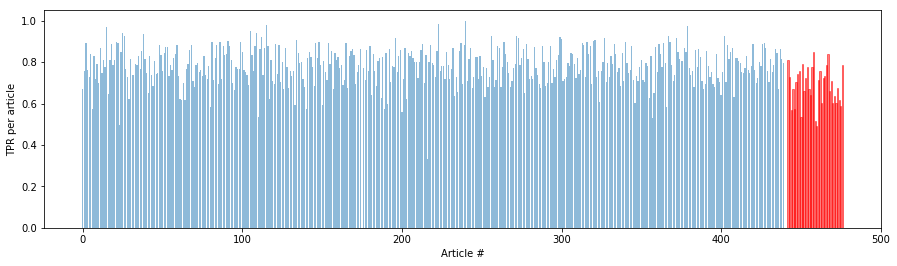

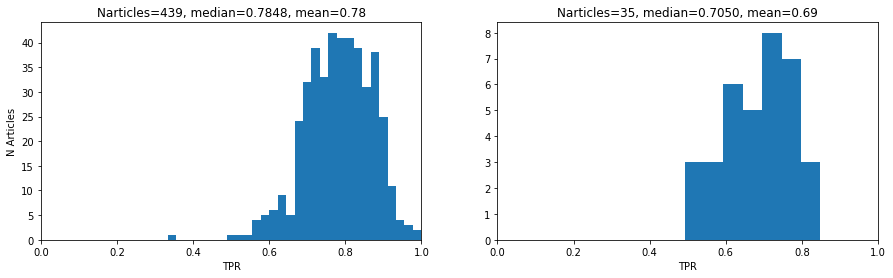

In [147]:
myvar = TPR0
varname = 'TPR'

# Plot bargraph
plotbar_train_dev2(myvar,Ntrain,Ndev,ylabel='{} per article'.format(varname),xlabel='Article #')

# # # Plot the histogram without containing any bads
# myvar without the bad articles
myvar2 = [tp for i, tp in enumerate(myvar) if i not in abads]

# Plot the histogram
ax = plothist_train_dev2(myvar2,Ntrain-Ntrain_bad,Ndev-Ndev_bad,xlabel=varname,ylabel='N Articles',devbins='auto')
set(ax['ax1'].set_xlim(0,1));
set(ax['ax2'].set_xlim(0,1));



## Plot FPR

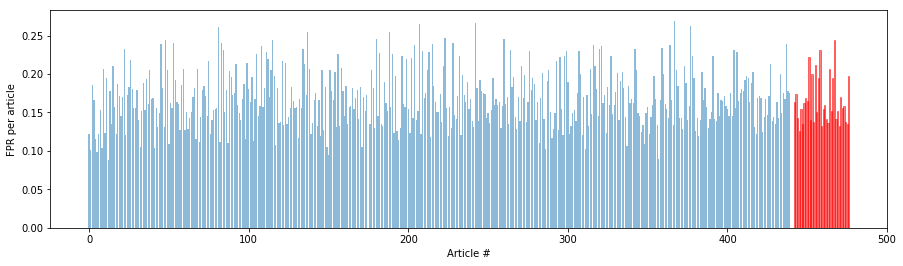

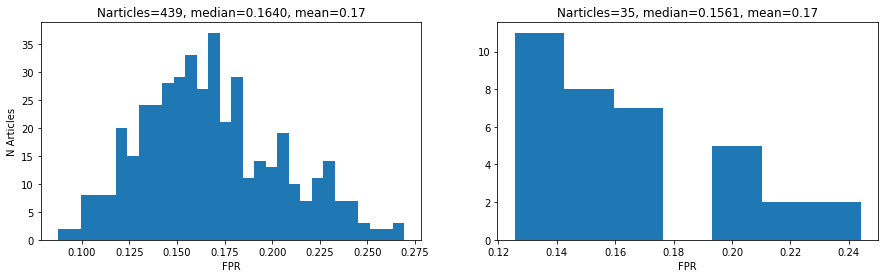

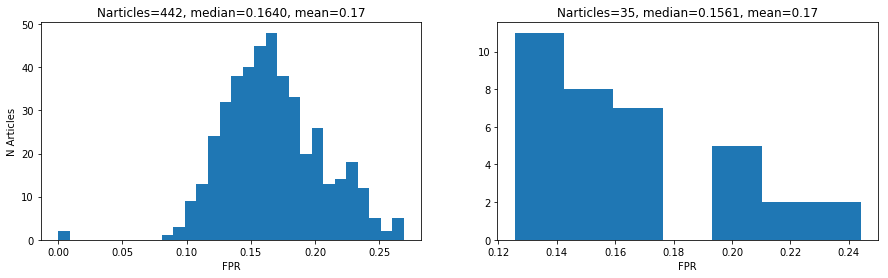

In [148]:
myvar = FPR0
varname = 'FPR'

# Plot bargraph
plotbar_train_dev2(myvar,Ntrain,Ndev,ylabel='{} per article'.format(varname),xlabel='Article #')

# # # Plot the histogram without containing any bads
# myvar without the bad articles
myvar2 = [tp for i, tp in enumerate(myvar) if i not in abads]

# REdefine for plotting with with more decimal places
def plothist_train_dev2(myvar,Ntrain,Ndev,xlabel='value',ylabel='N Articles',devbins=30):
    # Import fig stuff
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure
    import statistics

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(15, 4));
    ax1.hist(myvar[0:Ntrain-1], bins=30);  # arguments are passed to np.histogram
    ax1.set_title("Narticles={}, median={}, mean={}".format(str(Ntrain),'{0:.4f}'.format(statistics.median(myvar[0:Ntrain-1])),'{0:.2f}'.format(statistics.mean(myvar[0:Ntrain-1]))));
    ax1.set_ylabel('N Articles');
    ax1.set_xlabel(xlabel);

    ax2.hist(myvar[Ntrain:], bins=devbins);  # arguments are passed to np.histogram
    ax2.set_title("Narticles={}, median={}, mean={}".format(str(Ndev),'{0:.4f}'.format(statistics.median(myvar[Ntrain:])),'{0:.2f}'.format(statistics.mean(myvar[Ntrain:]))));
    ax2.set_xlabel(xlabel);
    return {'ax1': ax1, 'ax2':ax2}


# Plot the histogram
ax = plothist_train_dev2(myvar2,Ntrain-Ntrain_bad,Ndev-Ndev_bad,xlabel=varname,ylabel='N Articles',devbins='auto')
ax = plothist_train_dev2(myvar,Ntrain,Ndev,xlabel=varname,ylabel='N Articles',devbins='auto')
# set(ax['ax1'].set_xlim(0,1));
# set(ax['ax2'].set_xlim(0,1));



## Plot ACC

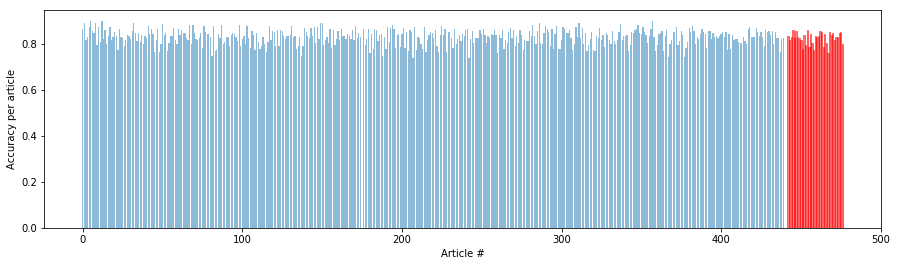

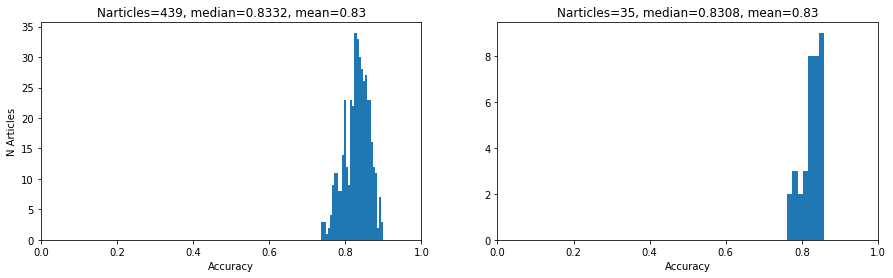

In [149]:
myvar = ACC0
varname = 'Accuracy'

# Plot bargraph
plotbar_train_dev2(myvar,Ntrain,Ndev,ylabel='{} per article'.format(varname),xlabel='Article #')

# # # Plot the histogram without containing any bads
# myvar without the bad articles
myvar2 = [tp for i, tp in enumerate(myvar) if i not in abads]

# Plot the histogram
ax = plothist_train_dev2(myvar2,Ntrain-Ntrain_bad,Ndev-Ndev_bad,xlabel=varname,ylabel='N Articles',devbins='auto')
set(ax['ax1'].set_xlim(0,1));
set(ax['ax2'].set_xlim(0,1));



## Plot True positives per sentence

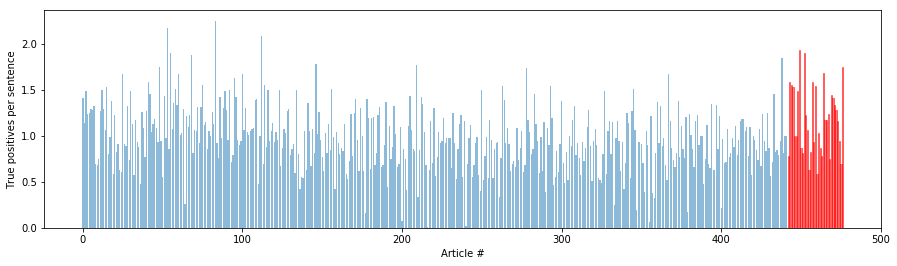

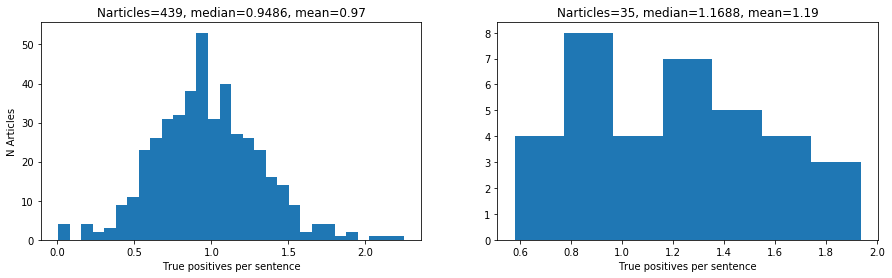

In [150]:
myvar = TPpersent0
varname = 'True positives per sentence'

# Plot bargraph
plotbar_train_dev2(myvar,Ntrain,Ndev,ylabel='{}'.format(varname),xlabel='Article #')

# # # Plot the histogram without containing any bads
# myvar without the bad articles
myvar2 = [tp for i, tp in enumerate(myvar) if i not in abads]

# Plot the histogram
ax = plothist_train_dev2(myvar2,Ntrain-Ntrain_bad,Ndev-Ndev_bad,xlabel=varname,ylabel='N Articles',devbins='auto')
# set(ax['ax1'].set_xlim(0,1));
# set(ax['ax2'].set_xlim(0,1));



## Plot False positives per sentence

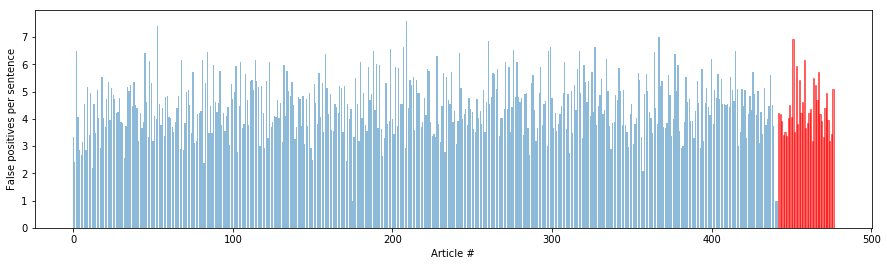

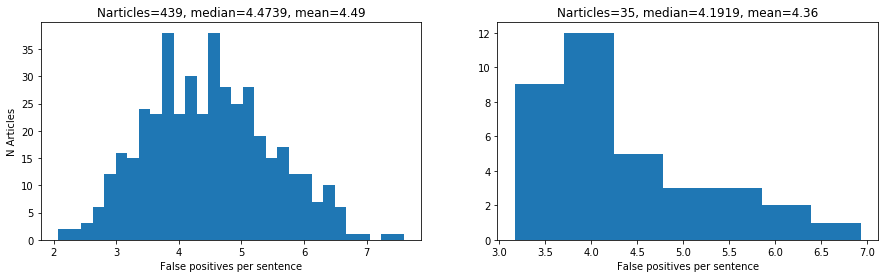

In [151]:
myvar = FPpersent0
varname = 'False positives per sentence'

# Plot bargraph
plotbar_train_dev2(myvar,Ntrain,Ndev,ylabel='{}'.format(varname),xlabel='Article #')

# # # Plot the histogram without containing any bads
# myvar without the bad articles
myvar2 = [tp for i, tp in enumerate(myvar) if i not in abads]

# Plot the histogram
ax = plothist_train_dev2(myvar2,Ntrain-Ntrain_bad,Ndev-Ndev_bad,xlabel=varname,ylabel='N Articles',devbins='auto')
# set(ax['ax1'].set_xlim(0,1));
# set(ax['ax2'].set_xlim(0,1));



## Find articles containing a lot of true positives

In [152]:

# Inds of all articles >0.4 TPR
inds = [i for i,x in enumerate(TPR0) if x >=0.08]

# Inds of all articles >0.4 TPR and in dev dataset
inds = [i for i,x in enumerate(TPR0) if x >=0.08 and x < 1.0 and i > Ntrain and i not in abads]

print(len(inds))
chosen_ind = inds[0]
print('Article #{}'.format(str(i)))
print(arts[chosen_ind]['title'])
print('True positive rate: {}'.format(str(TPR0[chosen_ind])))

34
Article #476
Computational_complexity_theory
True positive rate: 0.7302325581395349


In [153]:
# Pull out sample paragraph
a = arts[chosen_ind]
print(a['title'])

# AllenNLP results
words = [w for p in a['paragraphs'] for w in p['allenNER']['words'].split()]
# tags = [t for p in a['paragraphs'] for t in p['allenNER']['tags'].split()]
# tags = [not t == '0' for t in tags]   # Convert to binary
tags = [t for p in a['paragraphs'] for t in p['blank_classified_allen']]

# Ground truth
blank_classification = [bc for p in a['paragraphs'] for bc in p['blank_classification']]

Computational_complexity_theory


In [154]:
# Side by side compare

words_blanked_ground_truth = words2words_blanked(words,blank_classification)
words_blanked_allen = words2words_blanked(words,tags)

N=len(words_blanked_ground_truth)
N=20
print("============" + '\t\t\t' + "==========")
print("Ground truth" + '\t\t\t' + "Prediction")
print("============" + '\t\t\t' + "==========")
for c,w in zip(words_blanked_ground_truth[:N],words_blanked_allen[:N]):
    print(c + '\t\t\t\t' + w)


============			==========
Ground truth			Prediction
============			==========
______				______
complexity				______
theory				______
is				is
a				a
branch				branch
of				of
the				the
theory				theory
of				of
computation				______
in				in
theoretical				theoretical
computer				computer
science				science
that				that
focuses				focuses
on				on
classifying				classifying
______				______


## Ground truth blanked

In [155]:
# Blanked text
# print(words2text(words_blanked_ground_truth))

# Answers    
myanswers = words2answers(words,blank_classification)
print("Answers:")
print(set(myanswers))

Answers:
{'complex', 'set', 'taken', 'problems', 'matrices', 'alphabet', 'NC', 'classes', 'Hisao', 'another', 'statements', 'bitstrings', 'measure', 'multiplication', 'Presburger', 'gates', 'computability', 'transitions', 'Complexity', 'randomized', 'Alan', 'single', 'foundations', 'input', 'level', 'time', 'isomorphism', 'algorithms', 'intractable', 'bounds', 'Turing', 'adjacency', 'linear', 'concrete', 'second', 'formal', 'complicated', 'function', 'P', 'hierarchy', 'laid', 'reversed', 'difficulty', 'arithmetic', 'Manuel', 'probabilistic', 'algorithm', 'L', 'computational', '1965', 'computation', 'Decision', 'lower', 'bounding', 'Computational', 'notation', 'instances', 'storage', 'Interactive', 'NP', 'Algorithms', 'Ladner', 'quantum', 'suspected', 'proper', '1936', 'thesis', 'quantitative', 'knapsack', 'equal', 'computer', 'deterministically', 'worst', 'types', 'definitions', 'computers', 'instance', 'analysis', 'binary', 'language', 'reductions', 'inputs', 'Myhill', 'framework', 'f

In [156]:
# Blanked text
# print(words2text(words_blanked_allen))

# Answers    
myanswers = words2answers(words,tags)
print("Answers:")
print(set(myanswers))

Answers:
{'M', 'problems', 'measure', 'Karp', 'three', '1012', 'theorems', 'concept', 'recast', 'computations', 'rise', 'constraining', 'notion', 'level', 'Leonid', 'Π1', 'intractable', 'length', 'Turing', 'concrete', 'function', 'supercomputer', 'case', 'falls', 'algorithm', 'pairs', 'solvable', '×', 'computational', 'satisfiability', 'maximum', 'Decision', 'axioms', 'lower', 'k.', 'notation', 'DTIME(n2', 'square', 'transformation', 'graphs', '1936', 'quantitative', 'parallel', '2008', 'constant', 'definitions', 'aid', 'consumption', 'Mathematics', 'analysis', 'utterance', 'expected', 'inputs', 'practical', 'relaxing', 'Phrased', 'Boris', 'problem', 'Boolean', 'random', 'Levin', 'calculated', 'one', 'systems', 'Smullyan', 'rudimentary', 'general', 'exponential', 'n.log', 'Analogous', 'O', 'Yamada', 'triples', 'USSR', 'computing', 'strict', 'collapses', 'bits', 'converted', 'round', 'reduces', '100', 'C.', 'strip', 'yes', 'EXPTIME', 'counting', '1971', 'order', 'science', 'solved', 'AC

# All paragraphs - compare blanks

In [157]:
# Initialize stuff
TPR0 = []
FPR0 = []
ACC0 = []
Nsentences0 = []
TP0 = []
FP0 = []
FN0 = []
TN0 = []
TPpersent0 = []
FPpersent0 = []
abads = []
indices = {'i':[],'j':[],'k':[]}

art = arts[:]


# Only track true positives and false positive to avoid having to deal with other annoying edge cases
i=-1
k=-1
Ntrainp = 0
Ndevp=0
for a in art:
    i=i+1
    j=-1
    for p in a['paragraphs']:
        j=j+1
        k=k+1
        if i < Ntrain: Ntrainp=Ntrainp+1;
        else: Ndevp = Ndevp+1
        # AllenNLP results
        words = [w for w in p['allenNER']['words'].split()]
        tags = [t for t in p['allenNER']['tags'].split()]
        tags = [not t == '0' for t in tags]   # Convert to binary

        # Ground truth
        blank_classification = [bc for bc in p['blank_classification']]
        blank_classification = [b == 1 for b in blank_classification] # Convert to binary

        Nsentences2 = len(text2sentences(words2text(words)))

        sbc = sum(blank_classification)
        st = sum(tags)
        if sbc == 0:
            #print("Warning article {}, paragraph P{} contains {} ground truth blanks and {} tags. Likely bad".format(str(i),str(j),str(sbc),str(st)))

            # Make up some dummy values so don't confuse for a REAL outlier in plots. Should just drop this data in the future
            # This is ok because we'll skip them later if want to do stats - that's what bads is for
            TPR = 0.7
            FNR = 0.7
            ACC = 0.7
            TP = 100
            FP = 100
            FN = 100
            TN = 100
            TPpersent = 1
            FPpersent = 1
            abads.append(k)       # kth paragraph is bad
        else:
            TP = sum([b and t for b,t in zip(blank_classification,tags)])
            FP = sum([not b and t for b,t in zip(blank_classification,tags)])
            FN = sum([b and not t for b,t in zip(blank_classification,tags)])
            TN = sum([not b and not t for b,t in zip(blank_classification,tags)])
#             ACC = (TP+TN)/(TP+FP+FN+TN)
            ACC = sum([b == t for b,t in zip(blank_classification,tags)]) / len(tags)

            # Sensitivity, hit rate, recall, or true positive rate
            TPR = TP/(TP+FN)
#             # Specificity or true negative rate
#             TNR = TN/(TN+FP) 
#             # Precision or positive predictive value
#             PPV = TP/(TP+FP)
#             # Negative predictive value
#             NPV = TN/(TN+FN)
#             # Fall out or false positive rate
#             FPR = FP/(FP+TN)
            # False negative rate
            FNR = FN/(TP+FN)
#             # False discovery rate
#             FDR = FP/(TP+FP)

            # Per sententance values
            TPpersent = TP / Nsentences2
            FPpersent = FP / Nsentences2
    
        TPR0.append(TPR)
        FPR0.append(FPR)
        ACC0.append(ACC)
        TP0.append(TP)
        FP0.append(FP)
        FN0.append(FN)
        TN0.append(TN)
        TPpersent0.append(TPpersent)
        FPpersent0.append(FPpersent)
        indices['i'].append(i)
        indices['j'].append(j)
        indices['k'].append(k)



In [158]:
FPR0[0:10]

[0.19778609799772098,
 0.19778609799772098,
 0.19778609799772098,
 0.19778609799772098,
 0.19778609799772098,
 0.19778609799772098,
 0.19778609799772098,
 0.19778609799772098,
 0.19778609799772098,
 0.19778609799772098]

In [159]:
# # # Plot the histogram without containing any bads
# Calculate how this affects Ntrain / Ndev
Ntrainp_bad = len([b for b in abads if b < Ntrainp])
Ndevp_bad = len([b for b in abads if b >= Ntrainp])


In [160]:
print(Ntrainp)
print(Ndevp)
print(Ntrainp_bad)
print(Ndevp_bad)
max(abads)
len(FN0)

x = []
for a in abads:
    x.append(TPR0[a])


19035
1204
1383
13


## Plot TPR

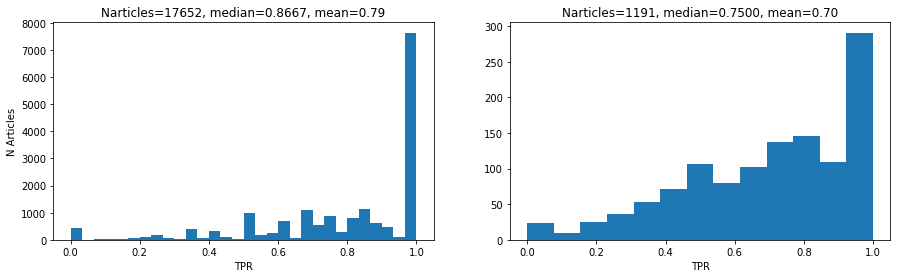

In [161]:
myvar = TPR0
varname = 'TPR'

# Plot bargraph (Don't plot figure for each paragraph!)
# plotbar_train_dev2(myvar,Ntrain,Ndev,ylabel='{}'.format(varname),xlabel='Article #')

# # # Plot the histogram without containing any bads
# myvar without the bad articles
myvar2 = [tp for i, tp in enumerate(myvar) if i not in abads]

# Plot the histogram
ax = plothist_train_dev2(myvar2,Ntrainp-Ntrainp_bad,Ndevp-Ndevp_bad,xlabel=varname,ylabel='N Articles',devbins='auto')
# set(ax['ax1'].set_xlim(0,1));
# set(ax['ax2'].set_xlim(0,1));



## Find paragraphs containing a lot of true positives

In [162]:

# Inds of all articles >0.4 TPR
inds = [i for i,x in enumerate(TPR0) if x >=0.6]

# Inds of all articles >0.4 TPR and in dev dataset
inds = [i for i,x in enumerate(TPR0) if x >=0.4 and x < 1.0 and i > Ntrainp and i not in abads]

print(len(inds))
chosen_ind = inds[0]
i = indices['i'][chosen_ind]
j = indices['j'][chosen_ind]
k = indices['k'][chosen_ind]
print('Article #{} paragraph #{}'.format(str(i),str(j)))
print(arts[i]['title'])
print('True positive rate: {}'.format(str(TPR0[chosen_ind])))

775
Article #442 paragraph #3
Normans
True positive rate: 0.8


In [163]:
# Pull out sample paragraph
p = arts[i]['paragraphs'][j]

# AllenNLP results
words = p['allenNER']['words'].split()
# tags = p['allenNER']['tags'].split()
# tags = [not t == '0' for t in tags]   # Convert to binary
tags = p['blank_classified_allen']

# Ground truth
blank_classification = p['blank_classification']

In [164]:
# Side by side compare

words_blanked_ground_truth = words2words_blanked(words,blank_classification)
words_blanked_allen = words2words_blanked(words,tags)

N=len(words_blanked_ground_truth)
N=20
print("============" + '\t\t\t' + "==========")
print("Ground truth" + '\t\t\t' + "Prediction")
print("============" + '\t\t\t' + "==========")
for c,w in zip(words_blanked_ground_truth[:N],words_blanked_allen[:N]):
    print(c + '\t\t\t\t' + w)


============			==========
Ground truth			Prediction
============			==========
In				In
the				the
course				course
of				of
the				the
10th				______
century				______
,				,
the				the
initially				initially
destructive				destructive
incursions				incursions
of				of
Norse				______
war				war
bands				bands
into				into
the				the
rivers				______
of				of


## Ground truth blanked

In [165]:
# Blanked text
print(words2text(words_blanked_ground_truth))

# Answers    
myanswers = words2answers(words,blank_classification)
print("Answers:")
print(myanswers)

In the course of the 10th century, the initially destructive incursions of Norse war bands into the rivers of France evolved into more permanent encampments that included local women and personal property. The Duchy of Normandy, which began in ______ as a fiefdom, was established by the treaty of Saint - Clair - sur - ______ between King Charles III of West Francia and the famed Viking ruler Rollo, and was situated in the former Frankish kingdom of Neustria. The treaty offered Rollo and his men the French lands between the river ______ and the Atlantic coast in exchange for their protection against further Viking incursions. The area corresponded to the northern part of present - day Upper Normandy down to the river ______, but the Duchy would eventually extend west beyond the ______. The territory was roughly equivalent to the old province of Rouen, and reproduced the Roman administrative structure of Gallia Lugdunensis II ( part of the former Gallia Lugdunensis ).
Answers:
['911', 'E

In [166]:
# Blanked text
print(words2text(words_blanked_allen))

# Answers    
myanswers = words2answers(words,tags)
print("Answers:")
print(myanswers)

In the course of the ______ ______, the initially destructive incursions of ______ war bands into the ______ of ______ evolved into more permanent encampments that included local women and personal property. The ______ of ______, which began in ______ as a ______, was established by the ______ of Saint - Clair - sur - Epte between King ______ III of ______ ______ and the famed ______ ruler ______, and was situated in the former ______ kingdom of ______. The treaty offered ______ and his men the French lands between the ______ ______ and the ______ ______ in exchange for their protection against further ______ ______. The area corresponded to the northern part of present - day Upper Normandy down to the river ______, but the ______ would eventually extend west beyond the ______. The territory was roughly equivalent to the old province of ______, and reproduced the Roman administrative structure of ______ ______ II ( part of the former ______ ______ ).
Answers:
['10th', 'century', 'Norse

In [167]:
TP = sum([b and t for b,t in zip(blank_classification,tags)])
FP = sum([not b and t for b,t in zip(blank_classification,tags)])
FN = sum([b and not t for b,t in zip(blank_classification,tags)])
TN = sum([not b and not t for b,t in zip(blank_classification,tags)])
ACC = (TP+TN)/(TP+FP+FN+TN)
ACC2 = sum([b == t for b,t in zip(blank_classification,tags)]) / len(tags)

In [168]:
print(ACC)
print(ACC2)
print(TP)
print(FP)

0.8333333333333334
0.8333333333333334
4
28


In [169]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)


In [170]:
print(TPR)
print(FPR)

0.8
0.16568047337278108
